In [ ]:
%pylab inline
%matplotlib inline
#!pip install git+https://github.com/jakevdp/JSAnimation.git

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['time']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [ ]:
# Perfect sensor
def sense(x):
    return x

In [ ]:
def simulate(Δt, x, u):
    x += Δt * u
    return x

In [ ]:
def control(t, y):
    ### WRITE YOUR CONTROL POLICY HERE:
    ux = 0
    uy = 0

    # points:
    # start: [-5, -7] w/ [0,0]
    # [10, -2] w/ [0, 5]
    # [0, -2] w/ [0, 5]
    # [0 ,6] w/ [5, 0]
    # [3,6] w/ [0, -5]
    # [3, -2] w/ [5, 0]
    # [7, -2] w/ [0, 5]
    # goal: [9, 10] w/ [0, 0]

    # start: [-5, -7] w/ [0,0]
    # [10, -2] w/ [0, 5]
    # to: rightmost part of bottom block
    if t < 7: 
      p0 = np.array([-5,-7])
      p0v = np.array([0,0])
      pf = np.array([10, -2])
      pfv = np.array([0,5])

      row = traj_gen(p0, p0v, pf, pfv, t, 7, 0)
      return array([row[0], row[1]])

    # [10, -2] w/ [0, 5]
    # [0, -2] w/ [0, 5]
    # to: bottom left of blue
    if t < 9:
      if t==7:
        print ("@ rightmost part of bottom block [10, -2]")
      p0 = np.array([10, -2])
      p0v = np.array([0,5])
      pf = np.array([0, -2])
      pfv = np.array([0,5])

      row = traj_gen(p0, p0v, pf, pfv, t, 2, 7)
      return array([row[0], row[1]])

    # [0, -2] w/ [0, 5]
    # [0 ,6] w/ [5, 0]
    # to: top left of blue
    if t < 10:
      if t==9:
        print ("@ bottom left of blue [0, -2]")
      p0 = np.array([0, -2])
      p0v = np.array([0, 5])
      pf = np.array([0, 6])
      pfv = np.array([5, 0])

      row = traj_gen(p0, p0v, pf, pfv, t, 1, 9)
      return array([row[0], row[1]])

    # [0 ,6] w/ [5, 0]
    # [3,6] w/ [0, -5]
    # to: top right of blue
    if t < 11:
      if t==10:
        print ("@ top left of blue [0, 6]")
      p0 = np.array([0, 6])
      p0v = np.array([5, 0])
      pf = np.array([3, 6])
      pfv = np.array([0, -5])

      row = traj_gen(p0, p0v, pf, pfv, t, 1, 10)
      return array([row[0], row[1]])

    # [3,6] w/ [0, -5]
    # [3, -2] w/ [5, 0]
    # to: bottom right of blue
    if t < 12:
      if t==11:
        print ("@ top right of blue [3, 6]")
      p0 = np.array([3, 6])
      p0v = np.array([0, -5])
      pf = np.array([3, -2])
      pfv = np.array([2.5, -2.5])

      row = traj_gen(p0, p0v, pf, pfv, t, 1, 11)
      return array([row[0], row[1]])

    # [3, -2] w/ [5, 0]
    # [7, -2] w/ [0, 5]
    # to: right underneath goal
    if t < 13:
      if t==12:
        print ("@ bottom right of blue [3, -2]")
      p0 = np.array([3, -2])
      p0v = np.array([2.5, -2.5])
      pf = np.array([7, -2])
      pfv = np.array([0, 5])

      row = traj_gen(p0, p0v, pf, pfv, t, 1, 12)
      return array([row[0], row[1]])

    # [7, -2] w/ [0, 5]
    # goal: [9, 10] w/ [0, 0]
    # to: goal
    if t < 18:
      if t==13:
        print ("@ underneath goal [7, -2]")
      p0 = np.array([7, 2])
      p0v = np.array([0, 5])
      pf = np.array([9, 10])
      pfv = np.array([0,0])

      row = traj_gen(p0, p0v, pf, pfv, t, 5, 13)
      return array([row[0], row[1]])

    




    return array([ux, uy])

def a2_gen(p0, p0v, pf, pfv, dt):
    return (3*pf - 3*p0 - 2*p0v*dt - pfv*dt) / (dt*dt)

def a3_gen(p0, p0v, pf, pfv, dt):
    return (2*p0 + (p0v+pfv)*dt - 2*pf) / (dt*dt*dt)

def traj_gen(p0, p0v, pf, pfv, t, dt, offset):
    a0 = p0
    a1 = p0v
    a2 = a2_gen(p0, p0v, pf, pfv, dt)
    a3 = a3_gen(p0, p0v, pf, pfv, dt)
    t1 = t-offset

    return (a1 + 2*a2*t1 + 3*a3*t1*t1)

In [ ]:
def collison(x):
  if x[0] >= 4 and x[0] <= 6 and x[1] >= -1 and x[1] <= 9:
    print("err 1: black middle-right")
  if x[0] >= .5 and x[0] <= 2.5 and x[1] >= 2 and x[1] <= 5:
    print("err 2: blue")
  if x[0] >= -6 and x[0] <= 9 and x[1] >= -5 and x[1] <= -4:
    print("err 3: long bottom")
  if x[0] >= 8 and x[0] <= 10 and x[1] >= 0 and x[1] <= 5:
    print("err 4: rightmost")
  if x[0] >= -4 and x[0] <= -2 and x[1] >= -3 and x[1] <= 5:
    print("err 5: leftmost")
  return

tf = 18.
Δt = 0.1    # Time step
time = linspace(0.,tf, int(tf / Δt) + 1)  # Time interval


# Initial conditions
x = array([-5., -7.])
x_log = [copy(x)]

for t in time:
    y = sense(x)
    u = control(t, y)    
    x = simulate(Δt, x, u)
    collison(x)
    x_log.append(copy(x))
  
#print(x)
    
x_log = array(x_log) 
  

@ rightmost part of bottom block [10, -2]
@ bottom left of blue [0, -2]
@ top left of blue [0, 6]
@ top right of blue [3, 6]
@ bottom right of blue [3, -2]
@ underneath goal [7, -2]


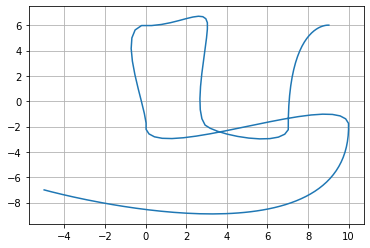

In [ ]:
grid()
plot(x_log[:,0], x_log[:,1])

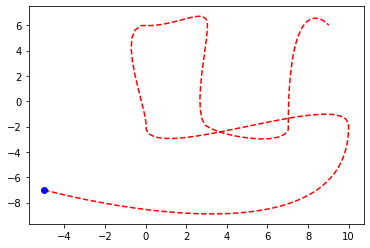

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation import IPython_display    
from IPython.display import HTML
    


fig, ax = plt.subplots()

def animate(t):
    ax.clear()
    
    # Path
    plot(x_log[:,0], x_log[:,1], 'r--')
    
    # Initial conditions
    plot(x_log[t,0], x_log[t,1], 'bo')
    

anim = animation.FuncAnimation(fig, animate, frames=len(time), interval=60)

HTML(anim.to_jshtml())